In [1]:
filepath = '~/Documents/RedRoot/csv/Attendee/83756443477 - Attendee Report.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mpld3
plt.rcParams['figure.dpi'] = 150
plt.style.use('ggplot')

defaultpie = {
    "autopct":"(%1.1f%%)",
    "pctdistance":0.8,
    "labeldistance":1.1,
    "rotatelabels":False,
    "textprops":{'fontsize':'xx-small'}
}

def get_count(key, df):
    return df.groupby(key)[key].count()

def shorten(s):
    if (s.startswith('Division')):
        i = s.index('(')
        return s[0:i]
    else:
        return s
    
def get_percent(counts):
    return np.array(list(map(lambda x: round(x / sum(counts),3)*100, counts)))

def get_table(s):
    return pd.DataFrame(np.vstack([s.values, get_percent(s.values)]).T,
                       columns=['Count', '%'], index=s.index)

In [3]:
df = pd.read_csv(filepath, index_col=False).drop_duplicates('Email')
df = df[df['NRCP Membership'] != 'Non-Member']
df = df[df['Attended'] == 'Yes']

In [4]:
division = get_count('NRCP Membership', df)
get_table(division)

,Count,%
NRCP Membership,,
"Division I (Governmental, Educational & International Policies)",23.0,17.7
Division II (Mathematical Sciences),24.0,18.5
Division III (Medical Sciences),2.0,1.5
Division IV (Pharmaceutical Sciences),2.0,1.5
Division IX (Physics),1.0,0.8
Division V (Biological Sciences),18.0,13.8
Division VI (Agriculture & Forestry),6.0,4.6
Division VII (Engineering & Industrial Research),18.0,13.8
Division VIII (Social Sciences),17.0,13.1


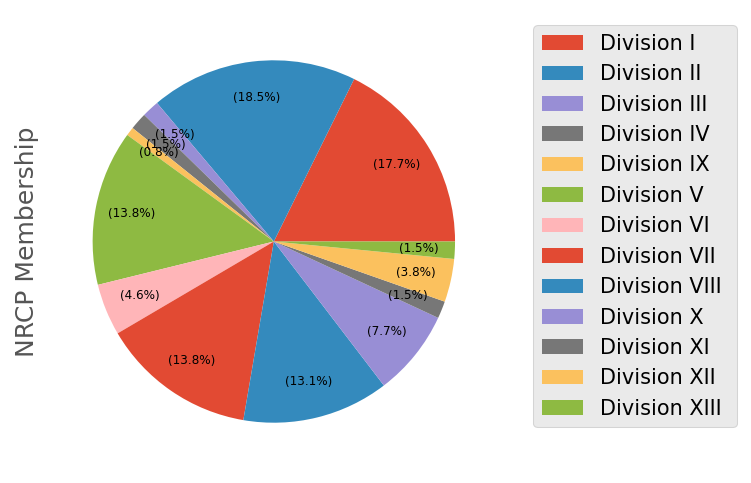

In [12]:
ex = [0] * len(division)
ex[3] = 0
ex[4] = 0
division.plot.pie(**{**defaultpie, "labeldistance":None,
                    "explode":ex})
plt.legend(loc=0, bbox_to_anchor=(1.05, 1), labels=division.index.map(shorten))
plt.show()

In [6]:
region = get_count('Region (in the Philippines)', df)
get_table(region)

,Count,%
Region (in the Philippines),,
BARMM,1.0,0.8
CAR,1.0,0.8
I,3.0,2.3
II,4.0,3.1
III,13.0,10.0
IV-A,23.0,17.7
IV-B,5.0,3.8
IX,1.0,0.8
NCR,38.0,29.2


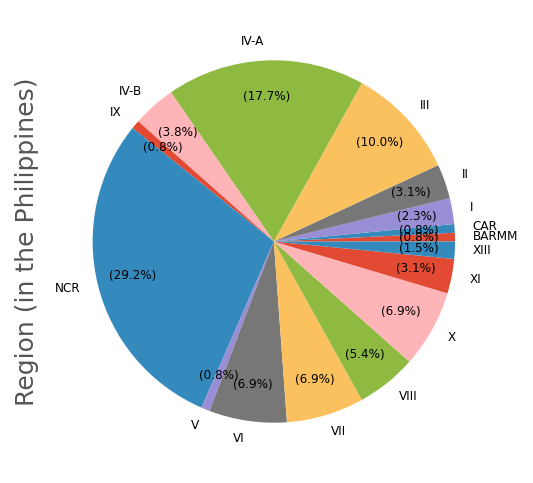

In [13]:
region.plot.pie(**defaultpie)
plt.show()

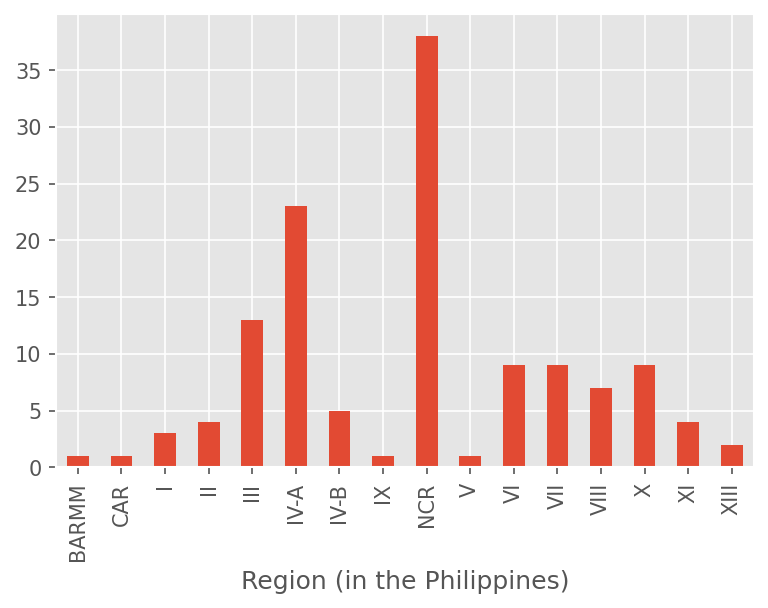

In [14]:
region.plot.bar()
plt.show()

In [9]:
sex = get_count('Sex', df)
get_table(sex)

,Count,%
Sex,,
Female,78.0,60.0
Male,52.0,40.0


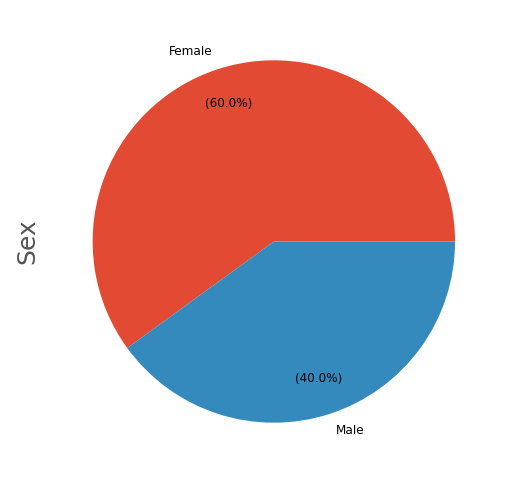

In [15]:
sex.plot.pie(**defaultpie)
plt.show()

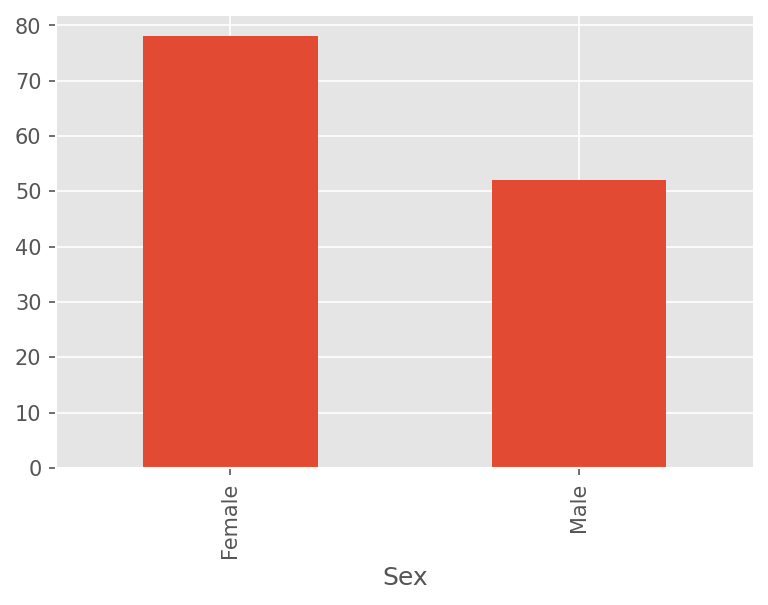

In [16]:
sex.plot.bar()
plt.show()